<a href="https://colab.research.google.com/github/zouden/mitra-test/blob/main/MitraTakeHomePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mitra Bio practice analysis
## Strategy
We will compare the counts at each locus to identify statistically significant differences in the north/south groups. 

## Setup
Load values from the CSV and set up column groups.

In [ ]:
## Load data into a dataframe
import pandas as pd

df = pd.read_csv('exercise_data.csv', index_col=[0,1])
df.columns = df.columns.str.split(' ', expand=True).rename(['Sample', 'Mod'])

df = pd.concat([df], axis=1,names=['Group'],keys=['north'])
df.columns.set_levels(['north','south'], level='Group', inplace=True)
df.columns.set_codes([0,0,0,0,0,0,1,1,1,1,1,1], level='Group', inplace=True)
df

Group                 north                          ...   south                        
Sample              Sample1     Sample2     Sample3  ... Sample4 Sample5     Sample6    
Mod                       A   B       A   B       A  ...       B       A   B       A   B
Chromosome Position                                  ...                                
chra       6              0  17      10  17       2  ...       0       1   0      13   9
           167           10  10       8  14      15  ...      15      14   2       6   0
           249           19   1      10  16       8  ...       0       9   0      18   8
           288           10   9      13   0       0  ...      15       8   0       8  12
           329           13  15       0   1       3  ...      18      18   4       6  12
...                     ...  ..     ...  ..     ...  ...     ...     ...  ..     ...  ..
chrk       9680           4   7      16  16       8  ...      14       3   3      11  11
           9701          13   4       1   0       5  ...       5      15  13       4  16
           9703           1  22      11   1      12  ...      13       3  16       1   8
           9837          16   5       1  14      14  ...      15       8  14      34   4
           9988          20   5       0   1      14  ...       1       4   7      13   9

[1100 rows x 12 columns]

## Perform KS test at each position for each modification.

The KS test is a robust estimation of whether two groups have different distributions. The output is a P value for the A and the B modifications, at each locus. 



In [ ]:
## At each position, compare the groups.
import scipy.stats
def test_func(data):
  group1 = data.xs(['north','A'], level=['Group','Mod']).values
  group2 = data.xs(['south','A'], level=['Group','Mod']).values
  group3 = data.xs(['north','B'], level=['Group','Mod']).values
  group4 = data.xs(['south','B'], level=['Group','Mod']).values
  test_A = scipy.stats.ks_2samp(group1, group2)
  test_B = scipy.stats.ks_2samp(group3, group4)
  return pd.Series([test_A.pvalue, test_B.pvalue], index=['pval_A','pval_B'])
  
results = df.apply(test_func, axis=1)
results

pval_A  pval_B
Chromosome Position                
chra       6            0.6     0.1
           167          0.6     0.6
           249          1.0     1.0
           288          0.6     1.0
           329          0.6     1.0
...                     ...     ...
chrk       9680         1.0     1.0
           9701         0.6     0.6
           9703         0.6     0.6
           9837         0.6     1.0
           9988         0.6     0.6

[1100 rows x 2 columns]

## Plot a histogram of the P values.

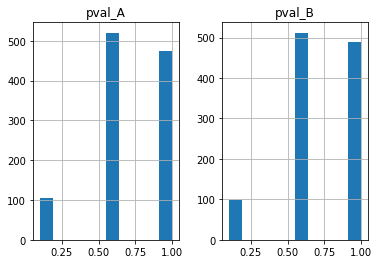

In [ ]:
results.hist();

## Select most relevant loci
The minimum P value is 0.1. Create a table of these positions with colour-coded values.

In [ ]:
print(sum(results.pval_A<=0.1), "indicative loci from modification A")
print(sum(results.pval_B<=0.1), "indicative loci from modification B")
selected = df[(results.pval_A<=0.1) & (results.pval_B<=0.1)]
print(len(selected), "indicative loci from both modifications. These are shown below.")
selected = (selected.reorder_levels([2,0,1], axis=1)
            .sort_index(axis=1,level=0)
)
print()
selected.sort_values(('A','north','Sample1')).style.background_gradient()

105 indicative loci from modification A
98 indicative loci from modification B
12 indicative loci from both modifications. These are shown below.



## Conclusion
The 12 loci above are strong candidates for identifying an individual as belonging to the North or South population. 